In [30]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import seaborn as sns

# Variables initialization:

In [ ]:
def APA(N,q,w,X,mu,delta,It,MSE1):
    for i in range(0, N):
        if i > q:
            qq = range(i, i - q, -1)
            yvec = y[qq]
            Xq = inputvec(qq)
            Xq = np.reshape(Xq, newshape=(Xq.shape[0], Xq.shape[1]))
            e = yvec - np.dot(Xq, w)    # Calculating error
            eins = y[i] - np.dot(w.T, inputvec(i))
            w = w + mu * np.dot(np.dot(Xq.T, np.linalg.inv(delta*np.eye(q)+np.dot(Xq, Xq.T))), e) # updating omega
            MSE1[i, It] = eins ** 2 # Matrix being filled with values of error squared 
    

In [15]:
N = 999
Pw0 = Pw1 = Pw2 = 1/3       # Prior probabilities are equal

m0 = np.array([0, 0, 0]).T
m1 = np.array([1, 2, 2]).T
m2 = np.array([3, 3, 4]).T

S0 = np.array([[0.8, 0.2, 0.1],
               [0.2, 0.8, 0.2],
               [0.1, 0.2, 0.8]])

S1 = np.array([[0.6, 0.01, 0.01],
               [0.01, 0.8, 0.01],
               [0.01, 0.01, 0.6]])

S2 = np.array([[0.6, 0.1, 0.1],
               [0.1, 0.6, 0.1],
               [0.1, 0.1, 0.6]])

# Generation of training set

In [16]:
Xtr_w0 = np.random.multivariate_normal(m0, S0, 333)  # vectors for class 0
ytr_w0 = 0*np.ones((333, 1))                        # Class label for class 0

Xtr_w1 = np.random.multivariate_normal(m1, S1, 333)  # vectors for class 1
ytr_w1 = 1*np.ones((333, 1))                        # Class labels for class 1

Xtr_w2 = np.random.multivariate_normal(m2, S2, 333)  # vectors for class 2
ytr_w2 = 2*np.ones((333, 1))                        # Class label for class2

# Concatenating in a single set for data and labels row wise
Xtr = np.concatenate((Xtr_w0, Xtr_w1, Xtr_w2), axis = 0)
ytr = np.concatenate((ytr_w0, ytr_w1, ytr_w2), axis = 0)

# Generation of test set

In [19]:
Xte_w0 = np.random.multivariate_normal(m0, S0, 333)    # vectors for class_0
yte_w0 = 0*np.ones((333, 1))                          # labels for class_0

Xte_w1 = np.random.multivariate_normal(m1, S1, 333)    # vectors for class_1
yte_w1 = 1*np.ones((333, 1))                          # labels for class_1

Xte_w2 = np.random.multivariate_normal(m2, S2, 333)    # vectors for class_2
yte_w2 = 2*np.ones((333, 1))                          # labels for class_2

Xte = np.concatenate((Xte_w0, Xte_w1, Xte_w2), axis = 0)
yte = np.concatenate((yte_w0, yte_w1, yte_w2), axis = 0)

# Data ploting

<IPython.core.display.Javascript object>


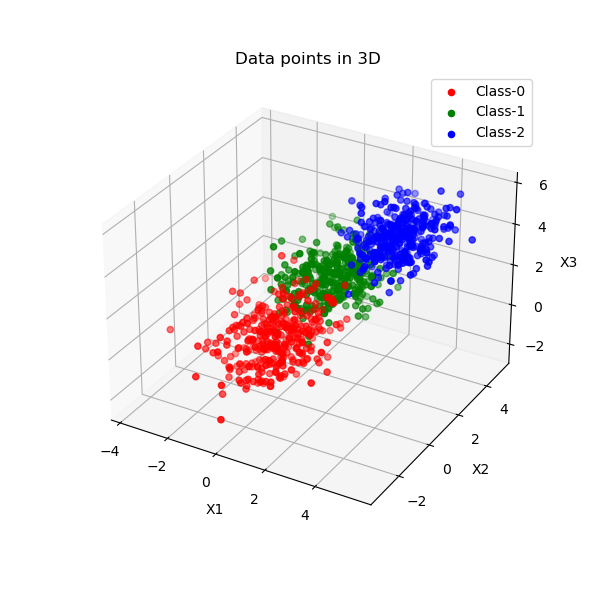

In [42]:
%matplotlib notebook
fig = plt.figure(figsize = (6,6))
ax  = fig.add_subplot(projection = "3d")
ax.scatter(Xtr_w0[:,0], Xtr_w0[:,1], Xtr_w0[:,2], marker = "o", color = "r", label = "Class-0")
ax.scatter(Xtr_w1[:,0], Xtr_w1[:,1], Xtr_w1[:,2], marker = "o", color = "g", label = "Class-1")
ax.scatter(Xtr_w2[:,0], Xtr_w2[:,1], Xtr_w2[:,2], marker = "o", color = "b", label = "Class-2")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Data points in 3D')
ax.legend()
plt.show()

# Question 1
***Calculation of ML estimates***

In [4]:
m0_hat = (1.0/(N/3))*np.sum(Xtr_w0, axis = 0)
S0_hat = (1.0/(N/3))*np.dot((Xtr_w0-m0_hat).T,(Xtr_w0-m0_hat)) 

m1_hat = (1.0/(N/3))*np.sum(Xtr_w1, axis = 0)
S1_hat = (1.0/(N/3))*np.dot((Xtr_w1-m1_hat).T,(Xtr_w1-m1_hat)) 

m2_hat = (1.0/(N/3))*np.sum(Xtr_w2, axis = 0)
S2_hat = (1.0/(N/3))*np.dot((Xtr_w2-m2_hat).T,(Xtr_w2-m2_hat)) 

S_hat = (1.0/3.0)*(S0_hat + S1_hat + S2_hat)

# Question 2
***Mahalanobis distance calculation on the test set from the estimate mean of each class***

In [26]:
inv_S = np.linalg.inv(S_hat) 
dm_0 = np.sqrt(np.sum(np.dot((Xte-m0_hat), inv_S)*(Xte-m0_hat), axis = 1))
dm_1 = np.sqrt(np.sum(np.dot((Xte-m1_hat), inv_S)*(Xte-m1_hat), axis = 1))
dm_2 = np.sqrt(np.sum(np.dot((Xte-m2_hat), inv_S)*(Xte-m2_hat), axis = 1))

dm_matrix = np.stack((dm_0, dm_1, dm_2), axis = 1)
Mahal_result = np.argmin(dm_matrix, axis = 1)

# Question 3
***Bayesian classifier calculation on the test set from the estimate mean of each class***

In [28]:
db_0 = Pw0*multivariate_normal.pdf(Xte, m0_hat , S_hat)
db_1 = Pw1*multivariate_normal.pdf(Xte, m1_hat , S_hat)
db_2 = Pw2*multivariate_normal.pdf(Xte, m2_hat , S_hat)
db_matrix = np.stack((db_0, db_1, db_2), axis = 1)
Bayes_result = np.argmax(db_matrix, axis = 1)

# Question  4
***To compute the error probability we compare the classification results with the reference matrix***

In [34]:
error_mahalanobis = 1-np.sum(Mahal_result  == yte.flatten())/N
error_Bayes = 1-np.sum(Bayes_result  == yte.flatten())/N
print('Bayesian Error: ',error_Bayes)
print('Mahalanobis Error ',error_mahalanobis)

Bayesian Error:  0.05005005005005003
Mahalanobis Error  0.05005005005005003


# Comments:
***Bayesian classifier error is same Mahalanobis distance classifier because we have given the same prior probabilities for every class which results in points being classified in the exact same way for both cases***